<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install tensorflow
!pip install keras

In [25]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
img_width,img_height=224,224
batch_size=32
epochs=7

In [27]:
path='/content/drive/MyDrive/Soil_Dataset'




In [28]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [29]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [30]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 204


In [31]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 204


In [32]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil']

In [33]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [34]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

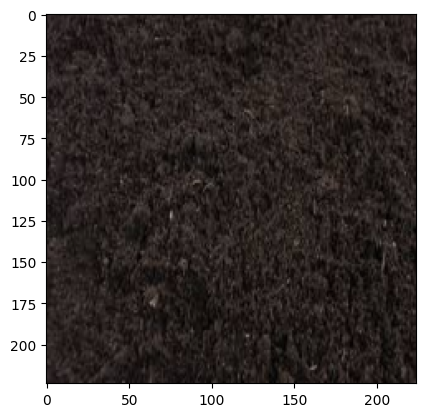

In [35]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_5.jpg')

In [36]:

trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)



In [37]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 816 images belonging to 4 classes.
Found 212 images belonging to 4 classes.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

img_height = 224
img_width = 224

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(img_height, img_width, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

# Compile the model with metrics
model.compile(loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer='adam',
              metrics=['accuracy', Precision(), Recall()])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)       

f

In [39]:
epochs=7


model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/7
26/26 [==============================] - 369s 14s/step - loss: 1.0411 - accuracy: 0.4767 - precision_1: 0.7243 - recall_1: 0.3027 - val_loss: 0.7921 - val_accuracy: 0.5849 - val_precision_1: 0.9545 - val_recall_1: 0.2972
Epoch 2/7
26/26 [==============================] - 257s 10s/step - loss: 0.5887 - accuracy: 0.7439 - precision_1: 0.7874 - recall_1: 0.6716 - val_loss: 0.6210 - val_accuracy: 0.7264 - val_precision_1: 0.7688 - val_recall_1: 0.6745
Epoch 3/7
26/26 [==============================] - 258s 10s/step - loss: 0.4389 - accuracy: 0.7978 - precision_1: 0.8090 - recall_1: 0.7733 - val_loss: 0.5892 - val_accuracy: 0.7453 - val_precision_1: 0.7727 - val_recall_1: 0.7217
Epoch 4/7
26/26 [==============================] - 257s 10s/step - loss: 0.4845 - accuracy: 0.7978 - precision_1: 0.8231 - recall_1: 0.7525 - val_loss: 0.3841 - val_accuracy: 0.8066 - val_precision_1: 0.8284 - val_recall_1: 0.7972
Epoch 5/7
26/26 [==============================] - 260s 10s/step - loss: 0.3

In [40]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

In [41]:
train_loss=model.history.history['loss']
train_loss

[1.0411392450332642,
 0.5886709690093994,
 0.43889132142066956,
 0.48454487323760986,
 0.3665081858634949,
 0.3347858488559723,
 0.27185994386672974]

In [42]:
train_acc=model.history.history['accuracy']
train_acc

[0.47671568393707275,
 0.7438725233078003,
 0.7977941036224365,
 0.7977941036224365,
 0.8345588445663452,
 0.8541666865348816,
 0.8884803652763367]

In [43]:
test_loss=model.history.history['val_loss']
test_loss

[0.7921253442764282,
 0.6210077404975891,
 0.5892108678817749,
 0.3841351568698883,
 0.3926198482513428,
 0.3197515308856964,
 0.2602924108505249]

In [44]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.5849056839942932,
 0.7264150977134705,
 0.7452830076217651,
 0.8066037893295288,
 0.8396226167678833,
 0.8726415038108826,
 0.8962264060974121]

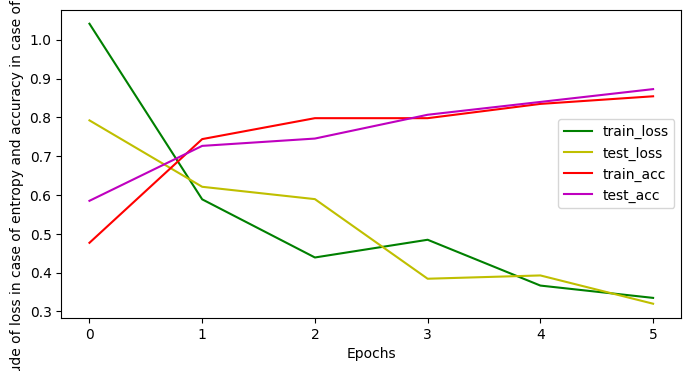

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epochs is defined somewhere in your code
epochs = 6

# Assuming train_loss, test_loss, train_acc, and test_acc are defined somewhere in your code
# Ensure they have the same length as the number of epochs
train_loss = train_loss[:epochs]
test_loss = test_loss[:epochs]
train_acc = train_acc[:epochs]
test_acc = test_acc[:epochs]

plt.figure(figsize=(8, 4))
plt.plot(np.arange(epochs), train_loss, color='g', label='train_loss')
plt.plot(np.arange(epochs), test_loss, color='y', label='test_loss')
plt.plot(np.arange(epochs), train_acc, color='r', label='train_acc')
plt.plot(np.arange(epochs), test_acc, color='m', label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Magnitude of loss in case of entropy and accuracy in case of performance')

plt.show()



In [ ]:
acc= model.evaluate(test)
print('Test accuracy:', acc)
#print('Test Acc:', acc)




Prediction System


1/1 [==============================] - 0s 177ms/step


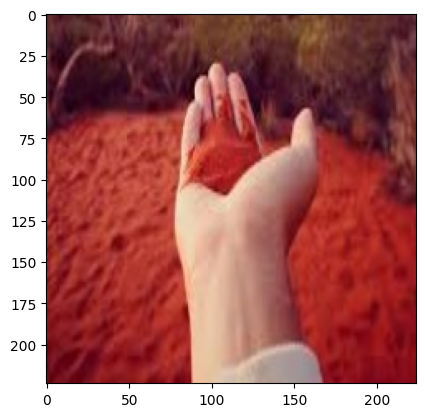

Predicted Class: Red_Soil
Probability: 1.0


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    predicted_class = class_labels[predicted_class_index]
    print('Predicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/drive/MyDrive/Soil_Dataset/Test/Red_Soil/Red_12.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)

